<a href="https://colab.research.google.com/github/sivask01/CMPE257-Fall23-Sivakrishna-Yaganti/blob/homework-1/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Generator
def generate_pla(N=20, w0=0, w1=1, w2=1, w3=0.5):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-10, 10)
        y_step = w0 + w1*x1 + w2*x2 + w3*x1*x2
        if y_step == 0:
            continue
        X1.append(x1)
        X2.append(x2)
        if y_step > 0:
            Y.append(1)
        elif y_step < 0:
            Y.append(-1)
        n += 1
    data = [np.array([1, X1[i], X2[i], Y[i]]) for i in range(N)]
    return data

f_w0, f_w1, f_w2 = 1, 1, 1
N = 100
data = generate_pla(N, f_w0, f_w1, f_w2)

df = pd.DataFrame(data)
df.drop([0], axis = 1, inplace=True)
df.columns = ['x1', 'x2', 'y']

In [88]:
# Modified PLA
def modified_PLA(df, learning_rate, max_iterations):
    w = np.zeros(3)
    updates = 0
    while updates < max_iterations:
        i = random.randint(0, len(df)-1)
        x = np.array([1, df.iloc[i]['x1'], df.iloc[i]['x2']])
        y = df.iloc[i]['y']
        s = np.dot(w, x)
        if y * s <= 1:
            if y * s <= 0:  # Incorrect classification
                w += learning_rate * y * x
            else:  # Correct classification but s and y not aligned well
                w += learning_rate * (y * s) * x
            updates += 1
    return w


# Plotting
def plot_data_and_hypothesis(df, w, f_w0, f_w1, f_w2):
    plt.scatter(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'], marker='o', color='r', label='y = 1')
    plt.scatter(df[df['y'] == -1]['x1'], df[df['y'] == -1]['x2'], marker='x', color='b', label='y = -1')
    x_values = np.linspace(-10, 10, 100)
    plt.plot(x_values, - (f_w0 + f_w1 * x_values) / f_w2, 'g-', label='Target Function (f)')
    plt.plot(x_values, - (w[0] + w[1] * x_values) / w[2], 'b--', label='Hypothesis (g)')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Training Data, Target Function, and Hypothesis')
    plt.show()

# Test Error
def compute_error(df, w):
    total_error = 0
    for index, row in df.iterrows():
        x = np.array([1, row['x1'], row['x2']])
        y = row['y']
        if np.sign(np.dot(w, x)) != y:
            total_error += 1
    return (total_error / len(df)) * 100  # Error as a percentage


In [89]:
n = 100  # learning rate
max_updates = 1000
w_g = modified_PLA(df, n, max_updates)

In [90]:
# w_g

In [91]:
# Generate test data
test_data = generate_pla(10000, f_w0, f_w1, f_w2)
test_df = pd.DataFrame(test_data)
test_df.drop([0], axis=1, inplace=True)
test_df.columns = ['x1', 'x2', 'y']

error_percentage = compute_error(test_df, w_g)
print(f"Error on the test set: {error_percentage:.2f}%")



Error on the test set: 46.09%


Plot when n = 100

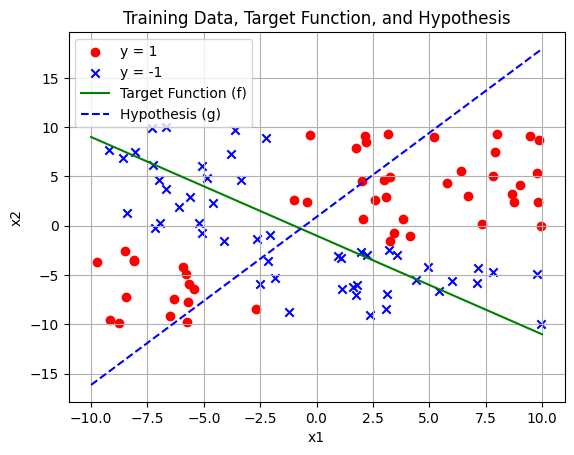

In [92]:
plot_data_and_hypothesis(df, w_g, f_w0, f_w1, f_w2)

**Question b)** When n = 1

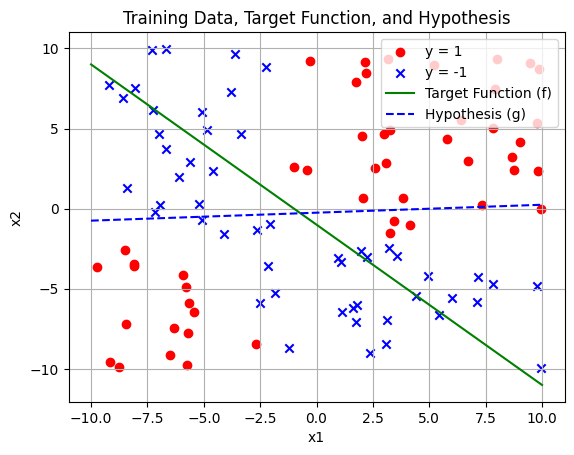

Error on the test set for n = 1: 60.53%


In [93]:
n_b = 1  # learning rate for part b
w_g_b = modified_PLA(df, n_b, max_updates)

# Plotting
plot_data_and_hypothesis(df, w_g_b, f_w0, f_w1, f_w2)

# Test Error
error_percentage_b = compute_error(test_df, w_g_b)
print(f"Error on the test set for n = 1: {error_percentage_b:.2f}%")


**Question c)** When n = 0.01

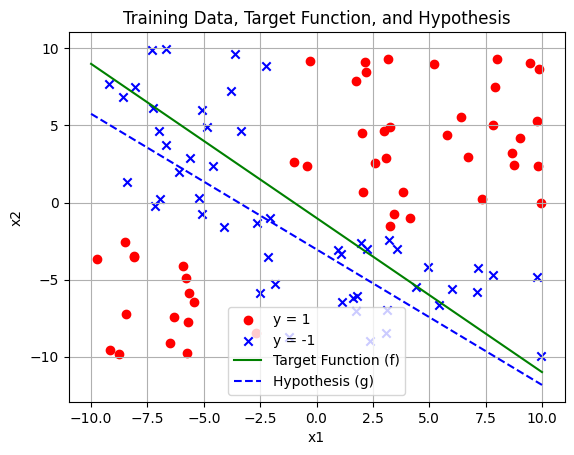

Error on the test set for n = 0.01: 44.45%


In [94]:
n_c = 0.01  # learning rate for part c
w_g_c = modified_PLA(df, n_c, max_updates)

# Plotting
plot_data_and_hypothesis(df, w_g_c, f_w0, f_w1, f_w2)

# Test Error
error_percentage_c = compute_error(test_df, w_g_c)
print(f"Error on the test set for n = 0.01: {error_percentage_c:.2f}%")


**Question d)** When n = 0.0001

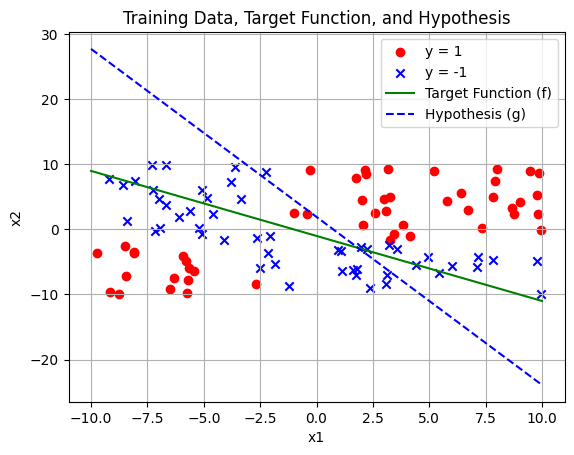

Error on the test set for n = 0.0001: 69.89%


In [95]:
n_d = 0.0001  # learning rate for part d
w_g_d = modified_PLA(df, n_d, max_updates)

# Plotting
plot_data_and_hypothesis(df, w_g_d, f_w0, f_w1, f_w2)

# Test Error
error_percentage_d = compute_error(test_df, w_g_d)
print(f"Error on the test set for n = 0.0001: {error_percentage_d:.2f}%")


In [96]:
print(f"Error on the test set: {error_percentage:.2f}%")
print(f"Error on the test set for n = 1: {error_percentage_b:.2f}%")
print(f"Error on the test set for n = 0.01: {error_percentage_c:.2f}%")
print(f"Error on the test set for n = 0.0001: {error_percentage_d:.2f}%")

Error on the test set: 46.09%
Error on the test set for n = 1: 60.53%
Error on the test set for n = 0.01: 44.45%
Error on the test set for n = 0.0001: 69.89%


**e) Compare the results**

After running the PLA multiple times with different learning rates, I got different solutions where sometimes getting best results as n decreases, sometimes getting a better results when n = 1 or 0.1.


# Observations and Comparison for the current result:

Upon implementing the Perceptron Learning Algorithm (PLA) with different learning rates and then evaluating the models on the test set, the following were the error rates observed:

- **n = 100**: Error on the test set was 46.09%.
- **n = 1**: Error increased to 60.53%.
- **n = 0.01**: A slightly improved error of 44.45% was observed.
- **n = 0.0001**: The error jumped significantly to 69.89%.

From these results, several insights can be drawn:

1. **Moderate Learning Rates Achieved Best Performance**: The best test performance was seen at \( n = 0.01 \) with an error of 44.45%. This suggests that a moderate learning rate might strike a good balance between making significant weight updates while not overshooting the optimal solution.

2. **High Learning Rate vs. Low Learning Rate**: The learning rate of \( n = 100 \) achieved an error of 46.09%, which was surprisingly better than the much smaller rate of \( n = 0.0001 \) that had an error of 69.89%. It's indicative that while the high learning rate may be taking larger steps and possibly overshooting in some cases, the very low learning rate is perhaps not making significant enough adjustments to the weights, leading to a model that's far from optimal.

3. **Potential for Overfitting**: The error rate of 60.53% at \( n = 1 \) suggests that the model could be fine-tuning too closely to the training data and losing its generalization ability on the test set.

4. **Consistency and Iterations**: Given that PLA picks random misclassified points, different runs can lead to different outcomes. It's worth noting that with a smaller learning rate like \( n = 0.0001 \), the algorithm might need more iterations than the provided limit to converge to an optimal solution.

In conclusion, these results highlight the importance of the learning rate in the PLA. Too high, and the algorithm might miss the optimal solution; too low, and it might not make significant progress. The choice of the learning rate can have substantial implications for the model's performance on unseen data, as observed in our test set outcomes. The moderate learning rate of \( n = 1 or n=0.0001 \) emerged as the most effective in this experiment, providing a balanced approach to weight adjustments and generalization.